# Neptune Project Data Manipulation Notebook
This notebook contains the code required to take all of the data for an individual year and produce lat-R and lat-gradR plots.

These first few cells are importing all of the required packages and then defining functions which I will call upon later, it is imperative that these are the first cells run on every loading of the notebook.

In [1]:
#This cell imports the required modules to the notebook
#RUN THIS CELL BEFORE ANY OTHER CODE IS RUN
import matplotlib.pyplot as plt     #imports graph plotting library
import astropy.io.fits as ast       #imports FITS manipulation library
import numpy as np                  #imports numerical manipulation library
import random                       #imports module to generate random numbers for monte carlo error propagation

#magic function that forces plots to appear in this notebook
%matplotlib inline                  
plt.ion()                           #function that loads plotting library in "interactive mode"

from astropy.utils.data import get_pkg_data_filename   #imports function to get filename of data file
from scipy.stats import sem   #imports function which does the standard error on the mean

print("Required Libraries Loaded Successfully")

def graderr(R, err, n): #user defined function does monte carlo error propagation
    """
    function for calculating the error in the gradient, using a monte carlo error propagation philosophy
    """
    grads = [[] for count in range(n)]                 #initialises list of lists, with indices [iteration][latitude]
    for i in range(n):                                 #loops through randomisation process n times
        randR = np.zeros(len(R))                       #initialises list of random R values
        for j in range(len(R)):                        #loops through the random function to form the list
            randR[j] = random.uniform(R[j]-err[j], R[j]+err[j]) #generates random number within bounds of error bars
        grads[i] = np.gradient(randR)                  #finds the gradient of the random R list generated above
        
    graderr = np.zeros(len(R))                         #initialises the list of gradient errors
    for i in range(len(R)):                            #loops through list of error calculation from the lists of random R
        gradforpoint = np.zeros(n)                     #initialises restructured list of iterations of grad, index [latitude]
        for j in range(n):                             #loops through the iterations
            gradforpoint[j] = grads[j][i]              #gets the gradR error through each iteration and makes a new list from it
        graderr[i] = (max(gradforpoint)-min(gradforpoint))/2 #calculates error by finding the mean of the max and min errors
    return(graderr)                                    #returns list of errors
        
print("User-Defined Functions Loaded Successfully")

Required Libraries Loaded Successfully
User-Defined Functions Loaded Successfully


# monte carlo method figuring out

In [10]:
R = [0.5,0.8, 0.888, 0.3]
err = [0.02, 0.02, 0.02, 0.02]
iterations = 2

grads = [[] for count in range(iterations) ]
for i in range(iterations):
    randR = np.zeros(len(R))
    for j in range(len(R)):
        randR[j] = random.uniform(R[j]-err[j],R[j]+err[j])
    grads[i] = np.gradient(randR)

print(grads)
print(grads[1][3])

graderr = np.zeros(len(R))
for i in range(len(R)):
    gradforpoint = np.zeros(iterations)
    for j in range(iterations):
        gradforpoint[j] = grads[j][i]
    graderr[i] = (max(gradforpoint)-min(gradforpoint))/2
    
print(graderr)

[array([ 0.31412763,  0.21090953, -0.25448404, -0.61665951]), array([ 0.27615953,  0.19509348, -0.25481152, -0.62365047])]
-0.6236504710933197
[0.01898405 0.00790803 0.00016374 0.00349548]


# Code which modifies the BONE colormap to give a higher contrast

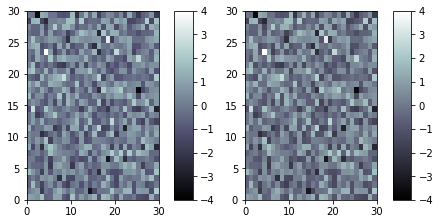

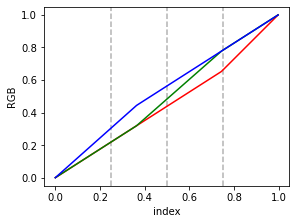

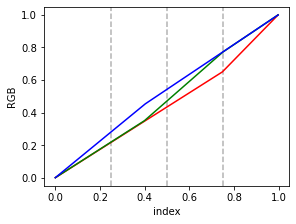

In [3]:
from matplotlib import cm #import colormap manipulation sections
from matplotlib.colors import ListedColormap, LinearSegmentedColormap #import functions to define a colormap

bone = cm.get_cmap('bone', 256)
print(bone)

newcmp = {'red': [[0.0, 0.0, 0.0],
                  [0.75, 0.65, 0.65],
                  [1.0, 1.0, 1.0]],
         'green': [[0.0, 0.0, 0.0],
                   [0.4, 0.35, 0.35],
                   [0.75, 0.77, 0.77],
                   [1.0, 1.0, 1.0]],
         'blue': [[0.0, 0.0, 0.0],
                  [0.4, 0.45, 0.45],
                  [1.0, 1.0, 1.0]]}
Neptune = LinearSegmentedColormap('Neptune', segmentdata = newcmp, N=256)
print(Neptune)

newcmp = {'red': [[0.0, 0.0, 0.0],
                  [1.0, 1.0, 1.0]],
         'green': [[0.0, 0.0, 0.0],
                   [1.0, 0.0, 0.0]],
         'blue': [[0.0, 0.0, 0.0],
                  [1.0, 0.0, 0.0]]}

def plot_examples(cms): #lifted function from matplotlib.org tutorials to help me modify the bone colormap
    """
    helper function to plot two colormaps
    """
    np.random.seed(19680801)
    data = np.random.randn(30, 30)

    fig, axs = plt.subplots(1, 2, figsize=(6, 3), constrained_layout=True)
    for [ax, cmap] in zip(axs, cms):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=-4, vmax=4)
        fig.colorbar(psm, ax=ax)
    plt.show()

plot_examples([bone, Neptune])

def plot_linearmap(cdict):
    newcmp = cdict
    rgba = newcmp(np.linspace(0, 1, 256))
    fig, ax = plt.subplots(figsize=(4, 3), constrained_layout=True)
    col = ['r', 'g', 'b']
    for xx in [0.25, 0.5, 0.75]:
        ax.axvline(xx, color='0.7', linestyle='--')
    for i in range(3):
        ax.plot(np.arange(256)/256, rgba[:, i], color=col[i])
    ax.set_xlabel('index')
    ax.set_ylabel('RGB')
    plt.show()

plot_linearmap(bone)
plot_linearmap(Neptune)


# Code to determine I/F Scale Factor for Observations

In [12]:
ExcelFormula = '=(O2*10/$B$124)/(($B$125/K2)^2*N2/PI())
AU = 1.496*(10^8)
solidangle = 
DistToSun = 
SolarFlux = 


# Code to analyse a single filter
This code aims to take a filter FITS files of Neptune, and turn it into a latitude-reflectance(R) profile. It then finds the gradient of reflectance and creates a latitude-gradR plot. 

Filename: OPAL_Neptune\Cycle_26\F467M_26_A.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (721, 361)   float32   

(361, 721)
[[  0.        0.        0.      ...   0.        0.        0.     ]
 [  0.        0.        0.      ...   0.        0.        0.     ]
 [  0.        0.        0.      ...   0.        0.        0.     ]
 ...
 [162.9493  162.94714 162.94496 ... 162.95378 162.95148 162.9493 ]
 [163.47815 163.47638 163.47444 ... 163.48195 163.48013 163.47815]
 [164.02983 164.02983 164.02983 ... 164.02983 164.02983 164.02983]]


(-5.0, 5.0)

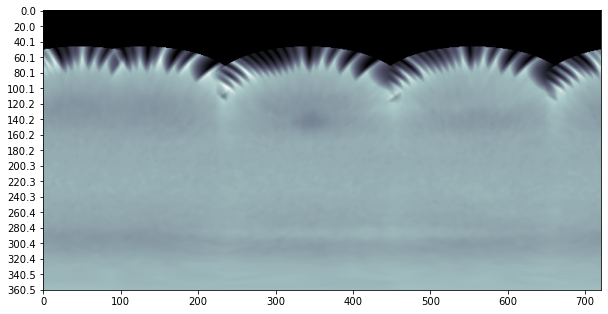

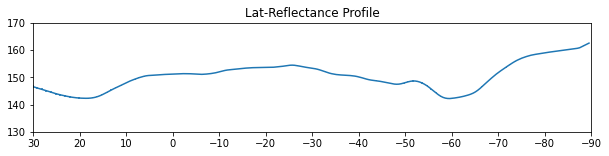

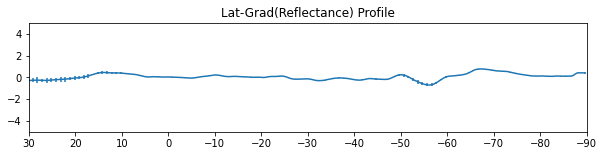

In [6]:
F467M_26 = get_pkg_data_filename('OPAL_Neptune/Cycle_26/F467M_26_A.fits') #opens the fits file at the location specified
ast.info(F467M_26) #displays the metadata of the image
print()

F467M_26_Data = ast.getdata(F467M_26) #pulls data from file and stores it, contains a matrix of all the pixel values
resolution = F467M_26_Data.shape #finds the size of the matrix, in the format [latitude pixels, longitude pixels]
print(resolution) #outputs the size of the matrix
print(F467M_26_Data)

#find the means of each line of latitude
#print(F467M_26_Data[0])

#DEFINING LAT AND LONG FOR AXIS DEFINITIONS
lat = ((180/resolution[0])*np.arange(resolution[0]))-90 #makes an evenly spaced range of values with np.arange, -const to centre plot
lat = -lat
#print(lat)
long = ((360/resolution[1])*np.arange(resolution[1]))-180
#print(long)
latticks = [-90,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90] #sets out lat positions where graph ticks
imglatticks = np.zeros(len(latticks))
for i in range(len(latticks)):
    imglatticks[i] = (latticks[i]+90)*(resolution[1]/360) #converts these to ticks on the image plot

#FIND MEAN OF A SINGLE ROW OF LATITUDE
#print(np.mean(F467M_26_Data[300]))

#MAKE A LIST OF MEAN REFLECTANCES WITH LAT
R = np.zeros(resolution[0])#generates a list of 0s, to the length passed to it
std = np.zeros(resolution[0])

#organise data in a lat-reflectance plot
for i in range(resolution[0]):
    R[i] = np.mean(F467M_26_Data[i]) #gets means of each line, saves to the numpy array
    std[i] = sem(F467M_26_Data[i]) #gets standard deviation of each line, saves to the numpy array
#print(R)

#PLOTTING THE DATA BADLY
#plt.figure(figsize=(10,10)) #init a plot/image figure space(horizontal, vertical)
#plt.plot(F467M_26_Data) #plots each line of longitude onto a plot, not useful, but interesting

#PLOTTING THE DATA TO AN IMAGE LIKE PLOT
plt.figure(figsize=(10,10))
plt.imshow(F467M_26_Data, cmap=Neptune) #creates the image plot of the data, colour map can be changed
plt.yticks(imglatticks)

#PLOTTING THE REFLECTANCE DATA
plt.figure(figsize=(10,2))
#plt.plot(lat,R) #plots the latitude vs reflectance
plt.errorbar(lat, R, yerr=std, errorevery=2) #plots latitude vs reflectance with error bars
plt.title('Lat-Reflectance Profile')
plt.xticks(latticks)
plt.xlim([30,-90]) #latitude limit setting
plt.ylim([130,170]) #reflectance limit setting

#PLOTTING THE GRADREFLECTANCE DATA
plt.figure(figsize=(10,2))
plt.errorbar(lat,np.gradient(R), yerr=graderr(R,std,10), errorevery=2) #plots the latitude vs gradient of reflectance with error bars
plt.title('Lat-Grad(Reflectance) Profile')
plt.xticks(latticks)
plt.xlim([30,-90]) #latitude limit setting
plt.ylim([-5,5]) #reflectance limit setting

# Multiplies up across 1 Year
This section shows the multiplication of the above code up to cover all filters for a particular year

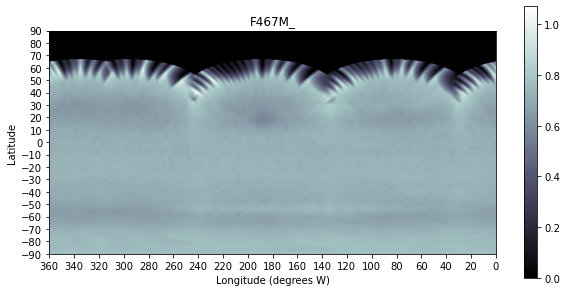

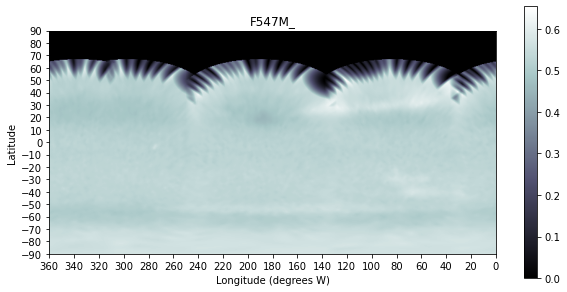

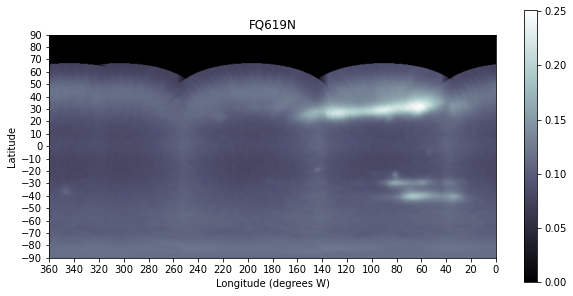

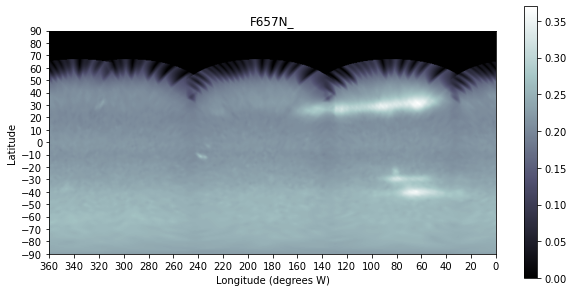

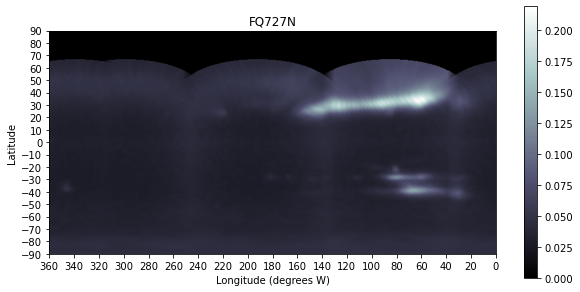

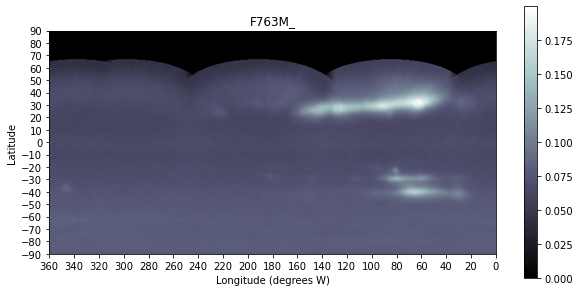

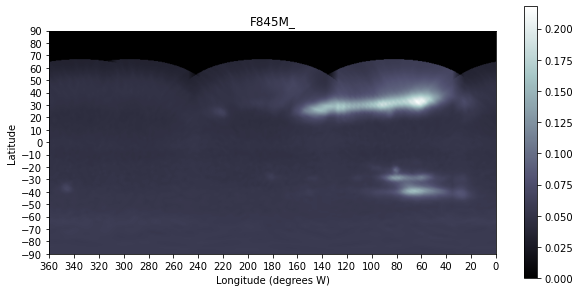

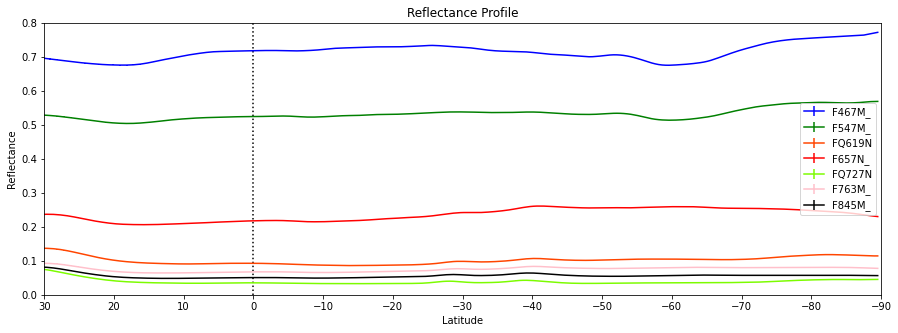

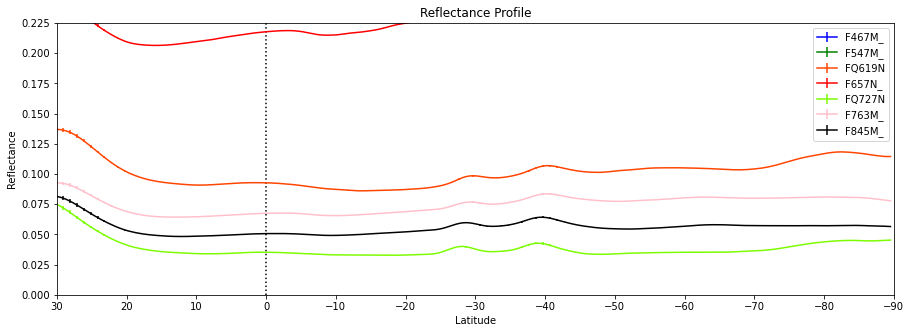

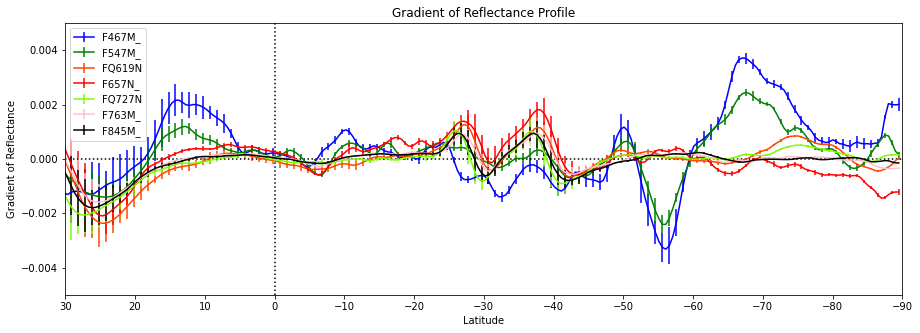

In [29]:
general_filepath = 'OPAL_Neptune/Cycle_26/'
filters = ['F467M_26_A.fits','F547M_26_A.fits','FQ619N_26_A.fits','F657N_26_A.fits','FQ727N_26_A.fits','F763M_26_A.fits','F845M_26_A.fits']
filtername = ['','','','','','','']
plotcolours = ['blue','green','orangered','red','lawngreen','pink','black'] #chosen to illustrate plots
IFScaleFactor = [0.00475,0.00249,0.00160,0.00405,0.00203,0.00145,0.00130] #taken from the OPAL ReadMe
NoOfFilters = len(filters)
colourmap = "bone"
latlimits = [30,-90] #values for latitude chosen
degpererrbar = 1    #chosen

filepaths = []
for i in range(NoOfFilters):
    filepaths.append(general_filepath + filters[i])
    filtername[i] = filters[i][0:6]
    
#initialise the data store variable
plotRData = [0,0,0,0,0,0,0]
plotGradRData = [0,0,0,0,0,0,0]
plotRstd = [0,0,0,0,0,0,0]
plotGradRErr = [0,0,0,0,0,0,0]

lat = -1*(((180/resolution[0])*np.arange(resolution[0]))-90)
latticks = [-90,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90]

long = (360/resolution[0])*np.arange(resolution[1])
longticks = [0,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,320,340,360]

for i in range(NoOfFilters):
    file = get_pkg_data_filename(filepaths[i])
    #ast.info(file)
    
    data = ast.getdata(file) * IFScaleFactor[i]
    resolution = data.shape
    
    R = np.zeros(resolution[0])
    Rstd = np.zeros(resolution[0])
    for j in range(resolution[0]): 
        R[j] = np.mean(data[j])
        Rstd[j] = sem(data[j])
    plotRData[i] = R
    plotGradRData[i] = np.gradient(R)
    plotRstd[i] = Rstd
    plotGradRErr[i] = graderr(R,Rstd,10)
    
    #PLOTS IMAGES
    plt.figure(figsize=(10,5))
    plt.imshow(data, cmap=colourmap, extent=[360,0,-90,90])
    plt.title(str(filtername[i]))
    plt.xlabel("Longitude (degrees W)")
    plt.ylabel("Latitude")
    plt.xticks(longticks)
    plt.yticks(latticks)
    plt.colorbar()

#PLOTTING THE REFLECTANCE DATA
plt.figure(figsize=(15,5)) #set up a figure space
axR = plt.subplot(111) #create a set of axes within the figure
for i in range(len(plotRData)):
    axR.errorbar(lat, plotRData[i], yerr = plotRstd[i], color = plotcolours[i], label = filtername[i], errorevery = degpererrbar*2)
plt.title('Reflectance Profile')
plt.xticks(latticks)
plt.xlabel('Latitude')
plt.xlim(latlimits) #latitude limit setting
plt.ylabel('Reflectance')
plt.ylim([0,0.8]) #reflectance limit setting
plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
plt.legend(loc='center right')

#PLOTTING THE REFLECTANCE DATA (ZOOMED PLOT)
plt.figure(figsize=(15,5)) #set up a figure space
axR = plt.subplot(111) #create a set of axes within the figure
for i in range(len(plotRData)):
    axR.errorbar(lat, plotRData[i], yerr = plotRstd[i], color = plotcolours[i], label = filtername[i], errorevery = degpererrbar*2)
plt.title('Reflectance Profile')
plt.xticks(latticks)
plt.xlabel('Latitude')
plt.xlim(latlimits) #latitude limit setting
plt.ylabel('Reflectance')
plt.ylim([0,0.225]) #reflectance limit setting
plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
plt.legend(loc='upper right')

#PLOTTING THE GRADIENT OF REFLECTANCE DATA
plt.figure(figsize=(15,5)) #set up a figure space
axR = plt.subplot(111) #create a set of axes within the figure
for i in range(len(plotRData)):
    axR.errorbar(lat, plotGradRData[i], yerr=plotGradRErr[i], color = plotcolours[i], label = filtername[i], errorevery = degpererrbar*2)
plt.title('Gradient of Reflectance Profile')
plt.xticks(latticks)
plt.xlabel('Latitude')
plt.xlim(latlimits) #latitude limit setting
plt.ylabel('Gradient of Reflectance')
plt.ylim([-0.005,0.005]) #reflectance limit setting
plt.axhline(y=0, color='black', ls=':')
plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
plt.legend(loc='upper left')

In [30]:
w = 0.1
off = 0.2
print("Anchor 0.75:",str(0.75*w+off))
print("Anchor 0.36:",str(0.36*w+off))
print("End",str(off+w))

Anchor 0.75: 0.275
Anchor 0.36: 0.23600000000000002
End 0.30000000000000004


# Storm/Cloud Detection Algorithm

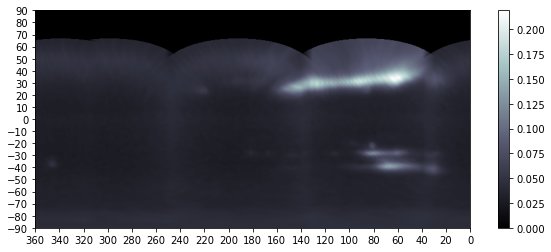

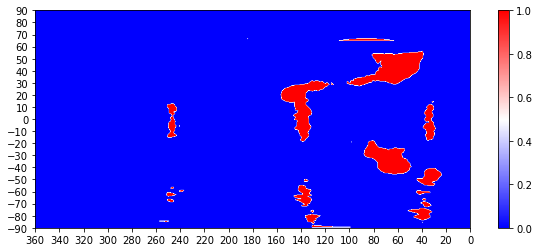

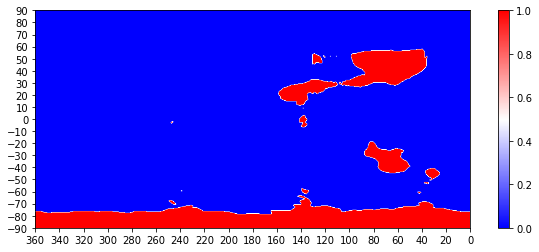

In [25]:
F467M_26 = get_pkg_data_filename('OPAL_Neptune/Cycle_26/FQ727N_26_A.fits') #opens the fits file at the location specified
#ast.info(F467M_26) #displays the metadata of the image
#print()

F467M_26_Data = ast.getdata(F467M_26)*0.00203 #pulls data from file and stores it, contains a matrix of all the pixel values
resolution = F467M_26_Data.shape #finds the size of the matrix, in the format [latitude pixels, longitude pixels]
#print(resolution) #outputs the size of the matrix
#print(F467M_26_Data)

#DEFINING LAT AND LONG FOR AXIS DEFINITIONS
lat = ((180/resolution[0])*np.arange(resolution[0]))-90 #makes an evenly spaced range of values with np.arange, -const to centre plot
lat = -lat
#print(lat)
long = ((360/resolution[1])*np.arange(resolution[1]))-180
#print(long)
latticks = [-90,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90] #sets out lat positions where graph ticks
longticks = [0,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,320,340,360]

#MAKE A LIST OF MEAN REFLECTANCES WITH LAT
R = np.zeros(resolution[0])
medians = np.zeros(resolution[0])#generates a list of 0s, to the length passed to it
std = np.zeros(resolution[0])
stormflag = [np.zeros(resolution[1]) for i in range(resolution[0])] #sets up array of 0s for the line by line medians stormflags
stormflagmed = [np.zeros(resolution[1]) for i in range(resolution[0])] #set up array of 0s for the whole image median stormflags

mean = np.mean(F467M_26_Data) #finds the mean reflectance of the entire image
median = np.median(F467M_26_Data) #finds the median reflectance of the entire image

for i in range(resolution[0]): #loops through latitudes
    LatLine = []
    LatLineMed = []
    medians[i] = np.median(F467M_26_Data[i]) #gets medians of each line, saves to numpy array
    std[i] = np.std(F467M_26_Data[i]) #gets standard deviation of each line, saves to the numpy array
    
    for j in range(resolution[1]): #loops through longitudes
        if F467M_26_Data[i][j] > (medians[i]+(2.25*std[i])): #compares the datapoint to the line by line median
            stormflag[i][j] = 1 #flags as storm when the pixel is brighter than NUMBER times the standard deviation from median
        else:
            LatLine.append(F467M_26_Data[i][j])
        if F467M_26_Data[i][j] > (median+(2.25*std[i])): #compares the datapoint to the global median
            stormflagmed[i][j] = 1 #flags as storm when the pixel is brighter than NUMBER times the standard deviation from median
        else:
            LatLineMed.append(F467M_26_Data[i][j])
    
#PLOTTING THE DATA TO AN IMAGE LIKE PLOT
plt.figure(figsize=(10,4))
plt.imshow(F467M_26_Data, cmap=Neptune, extent=[360,0,-90,90]) #creates the image plot of the data, colour map can be changed
plt.yticks(latticks)
plt.xticks(longticks)
plt.colorbar()
plt.show()

plt.figure(figsize=(10,4))
plt.imshow(stormflag, cmap='bwr', extent=[360,0,-90,90]) #creates the image plot of the data, colour map can be changed
plt.yticks(latticks)
plt.xticks(longticks)
plt.colorbar()
plt.show()

plt.figure(figsize=(10,4))
plt.imshow(stormflagmed, cmap='bwr', extent=[360,0,-90,90]) #creates the image plot of the data, colour map can be changed
plt.yticks(latticks)
plt.xticks(longticks)
plt.colorbar()
plt.show()

Filename: OPAL_Neptune\Cycle_26\FQ727N_26_A.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (721, 361)   float32   

(361, 721)
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.04424465 0.04424017 0.04423566 ... 0.04425367 0.04424915 0.04424465]
 [0.04450811 0.0445056  0.04450309 ... 0.04451314 0.04451065 0.04450811]
 [0.04478323 0.04478323 0.04478323 ... 0.04478323 0.04478323 0.04478323]]


(-0.0031, 0.002)

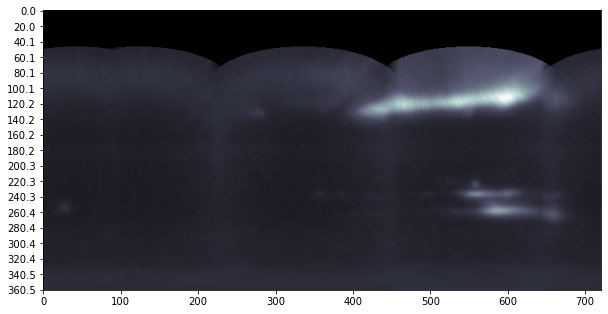

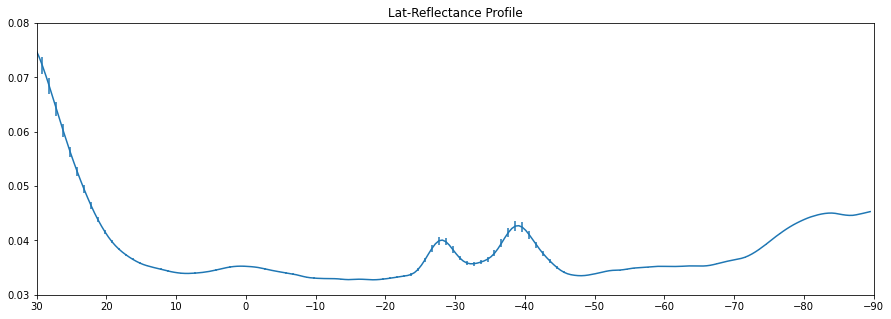

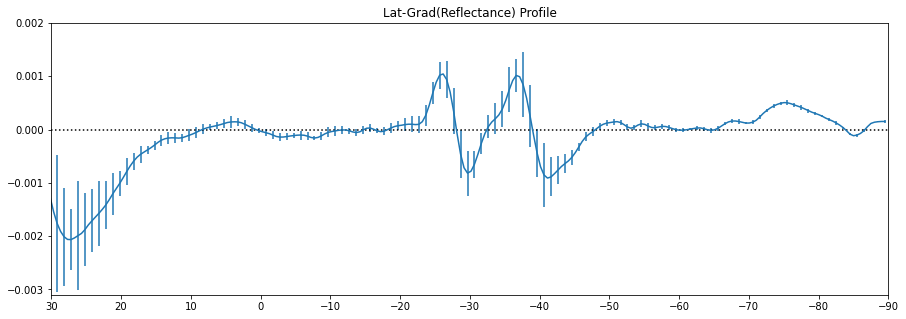

In [15]:
F467M_26 = get_pkg_data_filename('OPAL_Neptune/Cycle_26/FQ727N_26_A.fits') #opens the fits file at the location specified
ast.info(F467M_26) #displays the metadata of the image
print()

F467M_26_Data = ast.getdata(F467M_26)*0.00203 #pulls data from file and stores it, contains a matrix of all the pixel values
resolution = F467M_26_Data.shape #finds the size of the matrix, in the format [latitude pixels, longitude pixels]
print(resolution) #outputs the size of the matrix
print(F467M_26_Data)

#find the means of each line of latitude
#print(F467M_26_Data[0])

#DEFINING LAT AND LONG FOR AXIS DEFINITIONS
lat = ((180/resolution[0])*np.arange(resolution[0]))-90 #makes an evenly spaced range of values with np.arange, -const to centre plot
lat = -lat
#print(lat)
long = ((360/resolution[1])*np.arange(resolution[1]))-180
#print(long)
latticks = [-90,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90] #sets out lat positions where graph ticks
imglatticks = np.zeros(len(latticks))
for i in range(len(latticks)):
    imglatticks[i] = (latticks[i]+90)*(resolution[1]/360) #converts these to ticks on the image plot

#FIND MEAN OF A SINGLE ROW OF LATITUDE
#print(np.mean(F467M_26_Data[300]))

#MAKE A LIST OF MEAN REFLECTANCES WITH LAT
R = np.zeros(resolution[0])#generates a list of 0s, to the length passed to it
std = np.zeros(resolution[0])

#organise data in a lat-reflectance plot
for i in range(resolution[0]):
    R[i] = np.mean(F467M_26_Data[i]) #gets means of each line, saves to the numpy array
    std[i] = sem(F467M_26_Data[i]) #gets standard deviation of each line, saves to the numpy array
#print(R)

#PLOTTING THE DATA BADLY
#plt.figure(figsize=(10,10)) #init a plot/image figure space(horizontal, vertical)
#plt.plot(F467M_26_Data) #plots each line of longitude onto a plot, not useful, but interesting

#PLOTTING THE DATA TO AN IMAGE LIKE PLOT
plt.figure(figsize=(10,10))
plt.imshow(F467M_26_Data, cmap=Neptune) #creates the image plot of the data, colour map can be changed
plt.yticks(imglatticks)

#PLOTTING THE REFLECTANCE DATA
plt.figure(figsize=(15,5))
#plt.plot(lat,R) #plots the latitude vs reflectance
plt.errorbar(lat, R, yerr=std, errorevery=2) #plots latitude vs reflectance with error bars
plt.title('Lat-Reflectance Profile')
plt.xticks(latticks)
plt.xlim([30,-90]) #latitude limit setting
plt.ylim([0.03,0.08]) #reflectance limit setting

#PLOTTING THE GRADREFLECTANCE DATA
plt.figure(figsize=(15,5))
plt.axhline(y=0, color='black', ls=':')
plt.errorbar(lat,np.gradient(R), yerr=graderr(R,std,10), errorevery=2) #plots the latitude vs gradient of reflectance with error bars
plt.title('Lat-Grad(Reflectance) Profile')
plt.xticks(latticks)
plt.xlim([30,-90]) #latitude limit setting
plt.ylim([-0.0031,0.002]) #reflectance limit setting